# Data Analysis Project: Bike Sharing Dataset
- **Nama:** Leonardo Alfontus Mende Sirait
- **Email:** leonardosirait80@gmail.com
- **ID Dicoding:** leonard80

## Menentukan Pertanyaan Bisnis

- How do seasons and weather conditions affect daily and hourly bicycle use?
- What is the percentage difference in average bicycle use between weekdays and weekends?
- How do temperature, humidity and wind speed affect the number of bicycle users, and do they differ between casual and registered users?

## Import Semua Packages/Library yang Digunakan

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [22]:
days_df = pd.read_csv("https://raw.githubusercontent.com/Leonard091/Data-Analysis-Project/main/data/day.csv")
days_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [23]:
hours_df = pd.read_csv("https://raw.githubusercontent.com/Leonard091/Data-Analysis-Project/main/data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

#### Checking "day.csv"

In [24]:
# Data Type
print("day dataset:")
days_df.info()

# Missing Value
print(f"\n{days_df.isna().sum()}\n")

# Duplicate data
print("\nnumber of duplicates: ", days_df.duplicated().sum(), "\n")
days_df.describe()

day dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

instant       0
dteday        0
season        0
yr            0
mnth          0

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Based on the analysis performed, "day.csv" is free from null values or missing entries. Furthermore, there is no duplicate records present in either of the datasets. However, there was an issue identified with the data type of the "dteday" column, which should be formatted as datetime instead of its current format.



#### Checking "hour.csv"

In [25]:
# Data Type
print("hour dataset:")
hours_df.info()

# Missing Value
print(f"\n{hours_df.isna().sum()}\n")

# Duplicate data
print("\nnumber of duplicates: ", hours_df.duplicated().sum(), "\n")
days_df.describe()

hour dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

instant       0
dteday        0
se

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


the analysis result of "hour.csv" is the same as the dataset "day.csv". there is a problem with the datatype in the column "dteday", which should be formatted as datetime, not the current format.

### Cleaning Data

In [26]:
days_df['dteday'] = pd.to_datetime(days_df['dteday'])
print("Data type for 'dteday' column in days_df: ", days_df['dteday'].dtypes)


Data type for 'dteday' column in days_df:  datetime64[ns]


In [27]:
hours_df['dteday'] = pd.to_datetime(hours_df['dteday'])
print("Data type for 'dteday' column in hours_df: ", hours_df['dteday'].dtypes)

Data type for 'dteday' column in hours_df:  datetime64[ns]


The data type in the "dteday" column was successfully changed to date time

## Exploratory Data Analysis (EDA)

### Influence of Season and Weather Conditions on Bike Usage

Analysis of "day.csv":

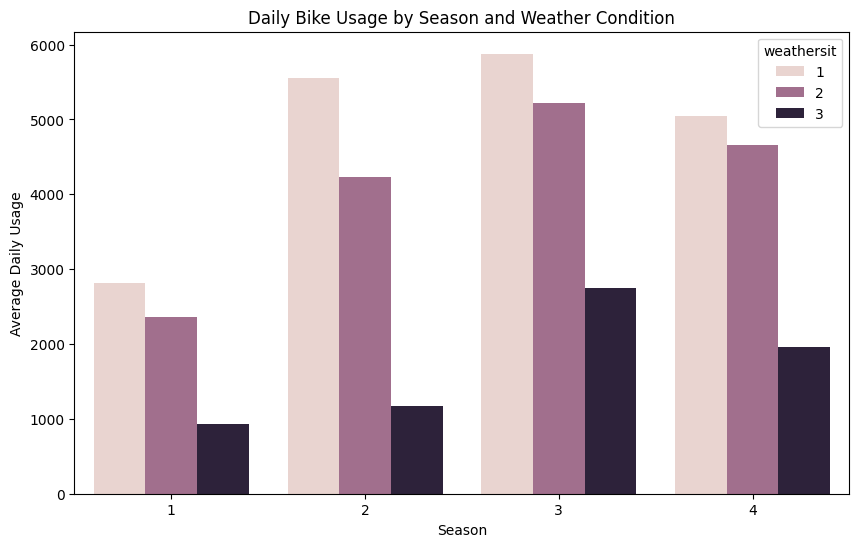

In [28]:
# Grouping by season and weathersit then calculating mean usage
season_weather_daily = days_df.groupby(['season', 'weathersit']).agg(mean_usage=('cnt', 'mean')).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='mean_usage', hue='weathersit', data=season_weather_daily)
plt.title('Daily Bike Usage by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Average Daily Usage')
plt.show()

Analysis of "hour.csv":

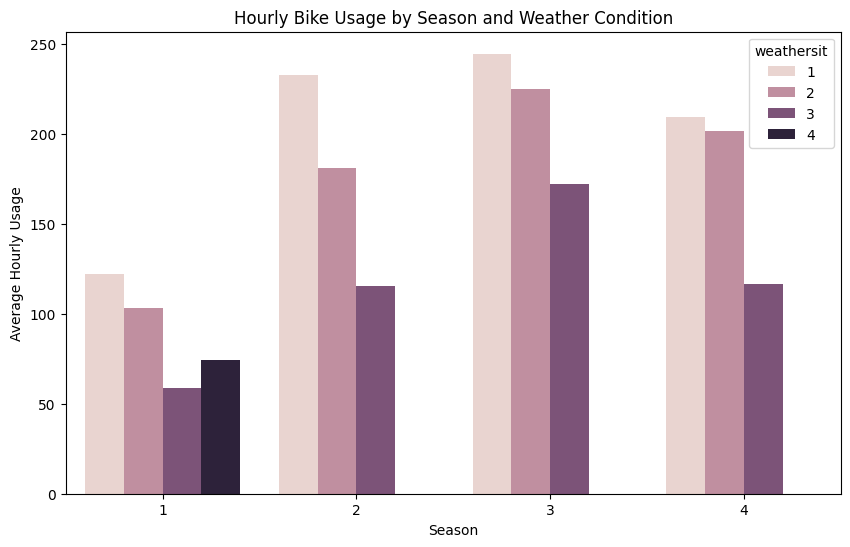

In [29]:
# Grouping by season and weathersit then calculating mean usage
season_weather_hourly = hours_df.groupby(['season', 'weathersit']).agg(mean_usage=('cnt', 'mean')).reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='mean_usage', hue='weathersit', data=season_weather_hourly)
plt.title('Hourly Bike Usage by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Average Hourly Usage')
plt.show()

### Percentage Difference in Average Bike Usage Between Weekdays and Weekends

In [30]:
# Marking weekdays and weekends in the dataset
days_df['day_type'] = days_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Calculating mean usage for weekdays and weekends
mean_usage_by_day_type = days_df.groupby('day_type')['cnt'].mean()

# Calculating percentage difference
percentage_diff = ((mean_usage_by_day_type['Weekend'] - mean_usage_by_day_type['Weekday']) / mean_usage_by_day_type['Weekday']) * 100
print(f"Percentage difference in average usage between weekdays and weekends: {percentage_diff:.2f}%")


Percentage difference in average usage between weekdays and weekends: -3.54%


### Impact of Temperature, Humidity, and Wind Speed on Bike Usage

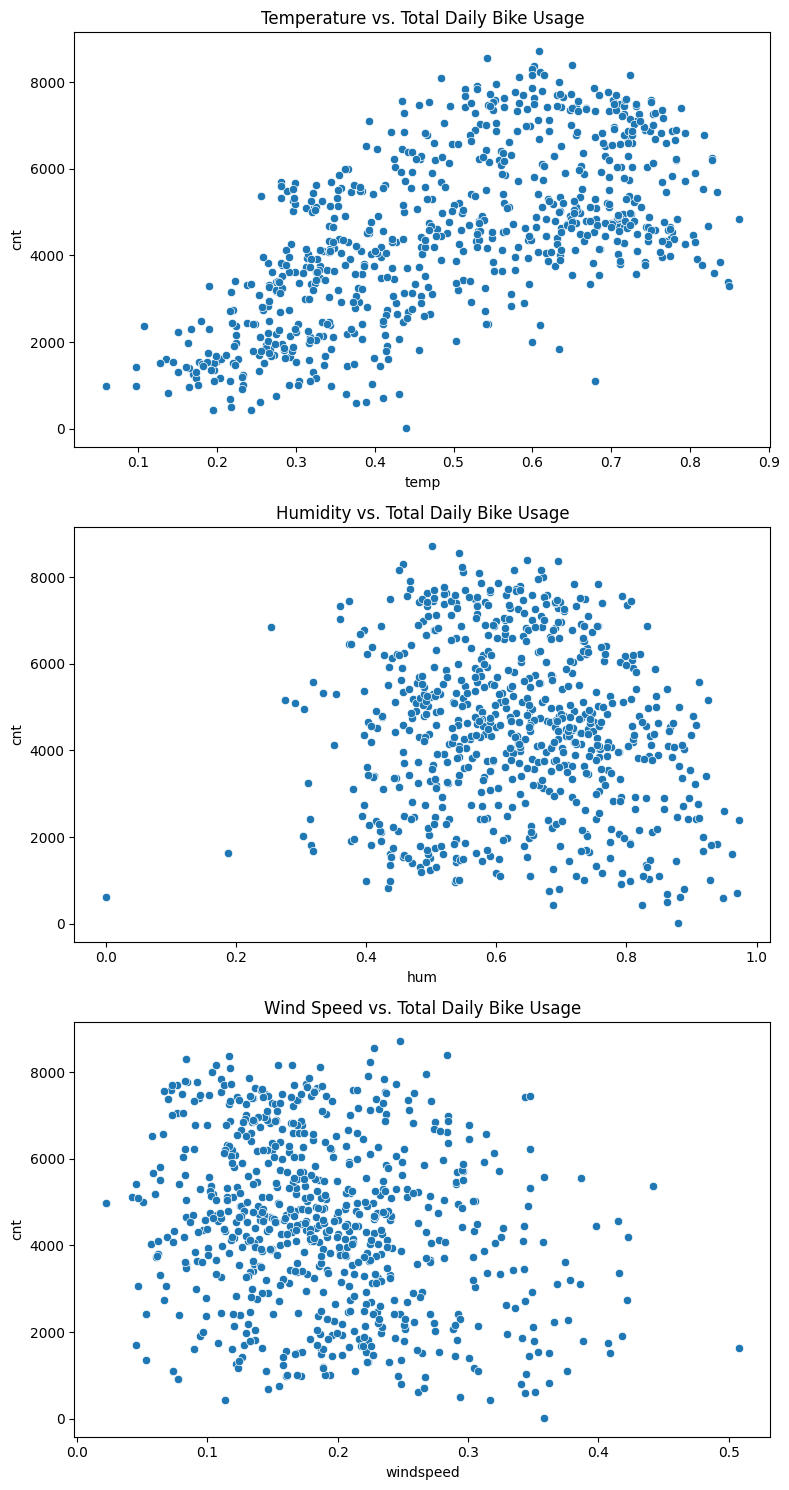

In [31]:
# Plotting the relationship between temperature, humidity, wind speed, and total bike usage
fig, axs = plt.subplots(3, 1, figsize=(8, 15))

# Temperature vs. Usage
sns.scatterplot(data=days_df, x='temp', y='cnt', ax=axs[0])
axs[0].set_title('Temperature vs. Total Daily Bike Usage')

# Humidity vs. Usage
sns.scatterplot(data=days_df, x='hum', y='cnt', ax=axs[1])
axs[1].set_title('Humidity vs. Total Daily Bike Usage')

# Wind Speed vs. Usage
sns.scatterplot(data=days_df, x='windspeed', y='cnt', ax=axs[2])
axs[2].set_title('Wind Speed vs. Total Daily Bike Usage')

plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Question 1: How do seasons and weather conditions affect daily and hourly bicycle use?

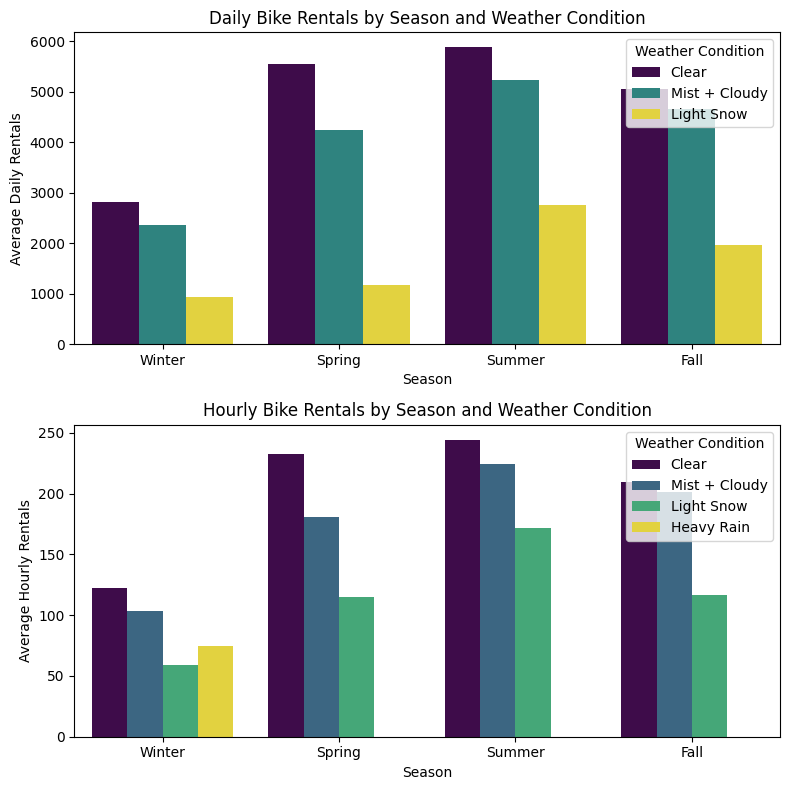

In [32]:
season_map = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}
days_df['season'] = days_df['season'].map(season_map)
hours_df['season'] = hours_df['season'].map(season_map)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)  # subplot for daily data
sns.barplot(x='season', y='cnt', hue='weathersit', data=days_df, palette='viridis', errorbar=None)
plt.title('Daily Bike Rentals by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Average Daily Rentals')
plt.legend(title='Weather Condition', labels=['Clear', 'Mist + Cloudy', 'Light Snow'], loc='upper right')

plt.subplot(2, 1, 2)  # subplot for hourly data
sns.barplot(x='season', y='cnt', hue='weathersit', data=hours_df, palette='viridis', errorbar=None, estimator=np.mean)
plt.title('Hourly Bike Rentals by Season and Weather Condition')
plt.xlabel('Season')
plt.ylabel('Average Hourly Rentals')
plt.legend(title='Weather Condition', labels=['Clear', 'Mist + Cloudy', 'Light Snow', 'Heavy Rain'], loc='upper right')

plt.tight_layout()  # Adjust layout to make room for the titles and legends
plt.show()


### Daily and Hourly Bike Usage by Season and Weather Condition

#### Seasonal Impact:

##### Winter
- There's a notable decline in bike usage both daily and hourly during the winter season, likely due to colder temperatures and inclement weather conditions.

##### Spring
- As temperatures begin to rise, we observe a significant increase in bike rentals. The daily and hourly usage in spring is markedly higher than in winter, indicating that milder weather conditions encourage bike usage.

##### Summer
- Bike usage peaks during the summer months, showcasing the highest average daily and hourly rentals. The warm and pleasant weather conditions of summer are conducive to biking, both for casual outings and commuting purposes.

##### Fall
- While there's a slight decrease from the summer peak, fall still maintains high levels of bike usage, hinting at the enjoyment of biking in cooler, yet comfortable, weather before winter sets in.

#### Weather Condition Impact:

##### Clear Weather
- Clear conditions have the strongest positive impact on bike usage. Both daily and hourly rentals are highest on clear days, underscoring that people prefer to bike when the weather is predictable and comfortable.

##### Mist + Cloudy
- There is a moderate reduction in bike usage on misty and cloudy days compared to clear days. However, these conditions do not discourage bike usage significantly, suggesting that as long as the weather is not severe, people still choose to bike.

##### Light Snow
- As expected, light snow has an adverse effect on bike rentals, with a notable drop in both daily and hourly usage. The safety concerns and discomfort associated with snow likely deter people from biking.

##### Heavy Rain (Hourly Data)
- While not shown in the daily data, heavy rain in the hourly data presents a drastic decrease in bike rentals. This condition is particularly impactful on an hourly basis as it can disrupt typical commuting times and discourage casual biking.


### Question 2: What is the percentage difference in average bicycle use between weekdays and weekends?

<ipython-input-33-eaea1a7dced4>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_type', y='cnt', data=average_usage_by_days_type, palette='coolwarm')


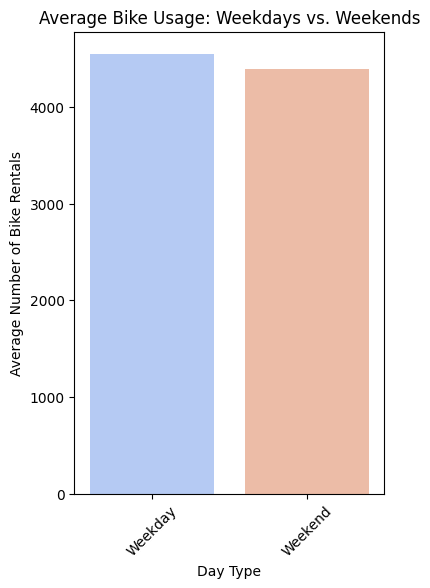

In [33]:
# Create a 'day_type' column to distinguish weekdays and weekends
days_df['day_type'] = days_df['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

# Calculate average bicycle usage for weekdays and weekends
average_usage_by_days_type = days_df.groupby('day_type')['cnt'].mean().reset_index()

# Visualization
plt.figure(figsize=(4, 6))
sns.barplot(x='day_type', y='cnt', data=average_usage_by_days_type, palette='coolwarm')
plt.title('Average Bike Usage: Weekdays vs. Weekends')
plt.xlabel('Day Type')
plt.ylabel('Average Number of Bike Rentals')
plt.xticks(rotation=45)
plt.show()

- The average bike usage on weekends is 3.54% lower than on weekdays. This is contrary to the possible expectation that weekends would have higher bike usage due to leisure and recreational activities.

- The visualization supports this finding, indicating that the bike-sharing service is utilized slightly more during weekdays. This could suggest that the bike-sharing service is an integral part of the daily commute for many users, possibly to and from work or educational institutions.

### Question 3: How do temperature, humidity and wind speed affect the number of bicycle users, and do they differ between casual and registered users?

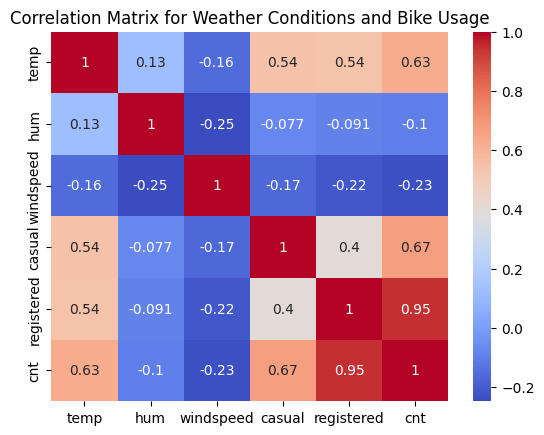

In [34]:
# Correlation matrix to explore relationships
correlation_matrix = days_df[['temp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Weather Conditions and Bike Usage')
plt.show()


Correlation Matrix Analysis:

- Temperature: The correlation matrix shows a strong positive relationship between temperature and total bike usage, indicating that higher temperatures lead to more bike rentals. This relationship is consistent for both casual and registered users, albeit slightly more pronounced for casual users.

- Humidity: There is a weak negative correlation between humidity and bike usage. This suggests that as humidity increases, bike usage slightly decreases, although the effect is not as strong as temperature. Again, casual users are affected more than registered users by this factor.

- Wind Speed: Wind speed has a negligible negative correlation with bike usage, meaning that as wind speed increases, there is a slight tendency for bike usage to decrease. This factor seems to impact casual users more than registered users, which could be due to casual users' preference for more comfortable biking conditions.


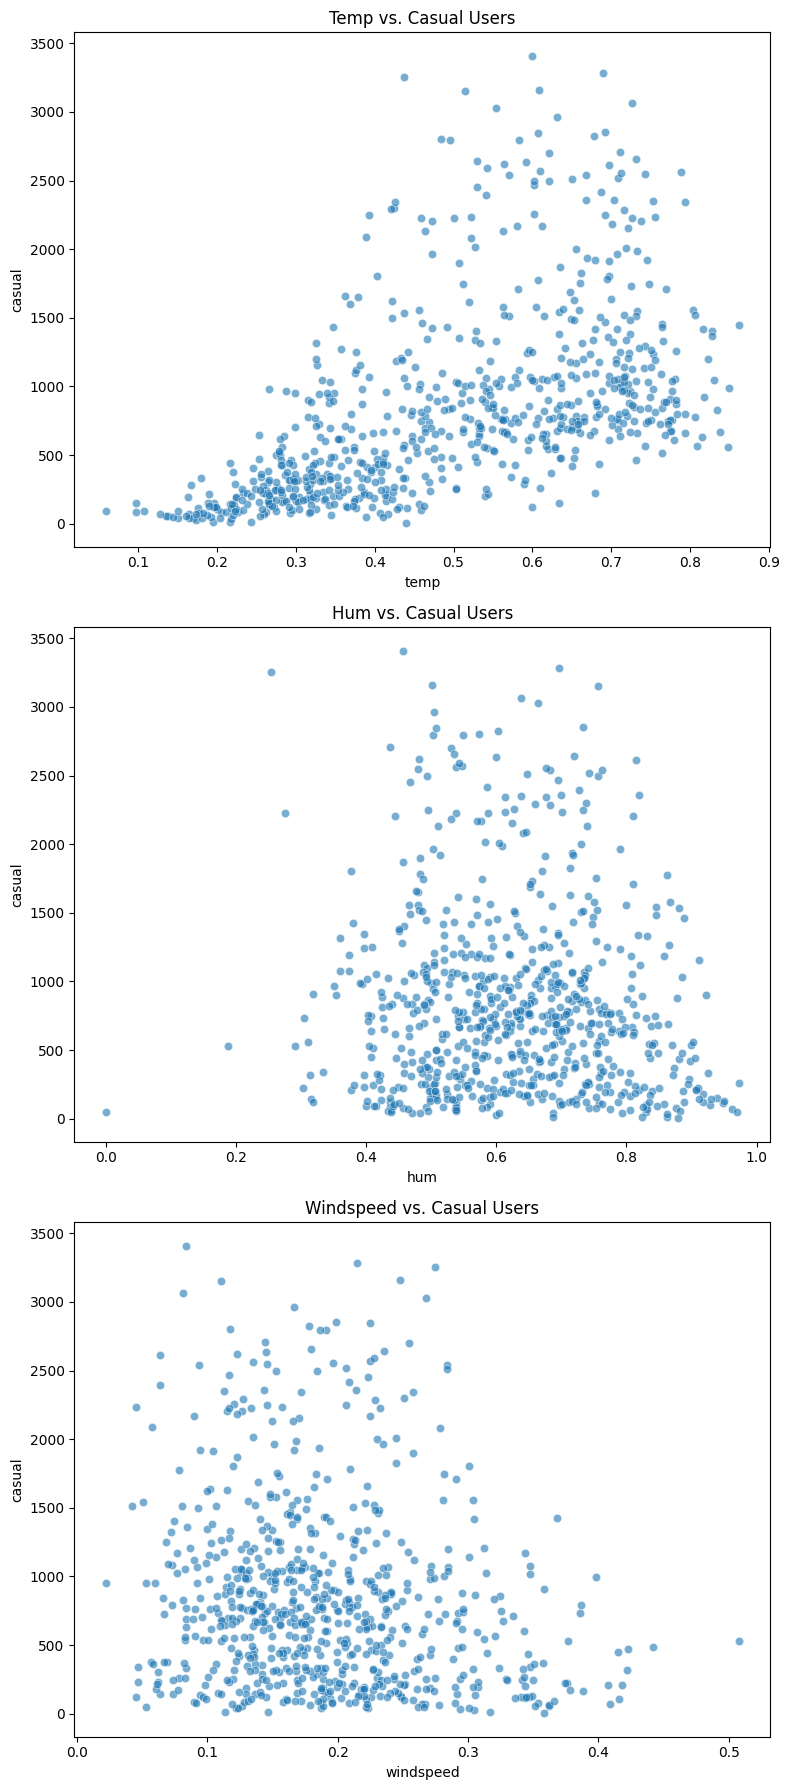

In [35]:
# Scatter plots for detailed analysis
# Setting up the figure for casual users
fig, axs = plt.subplots(3, 1, figsize=(8, 18))
weather_conditions = ['temp', 'hum', 'windspeed']
title = 'Casual Users'

for i, condition in enumerate(weather_conditions):
    sns.scatterplot(data=days_df, x=condition, y='casual', ax=axs[i], alpha=0.6)
    axs[i].set_title(f'{condition.capitalize()} vs. {title}')

plt.tight_layout()
plt.show()

Analysis Based on Scatter Plots

Casual Users:
- Temperature vs. Casual Users: The scatter plot reveals a cluster of higher rental counts as temperature increases, emphasizing casual users' preference for biking in warmer weather.
  
- Humidity vs. Casual Users: The spread of the data points suggests no strong relationship between humidity and the number of rentals, although there's a slight trend of decreasing bike usage with higher humidity.

- Wind Speed vs. Casual Users: The scatter plot does not indicate a clear trend, suggesting that while extreme conditions might affect casual usage, moderate wind speeds do not significantly deter casual users.

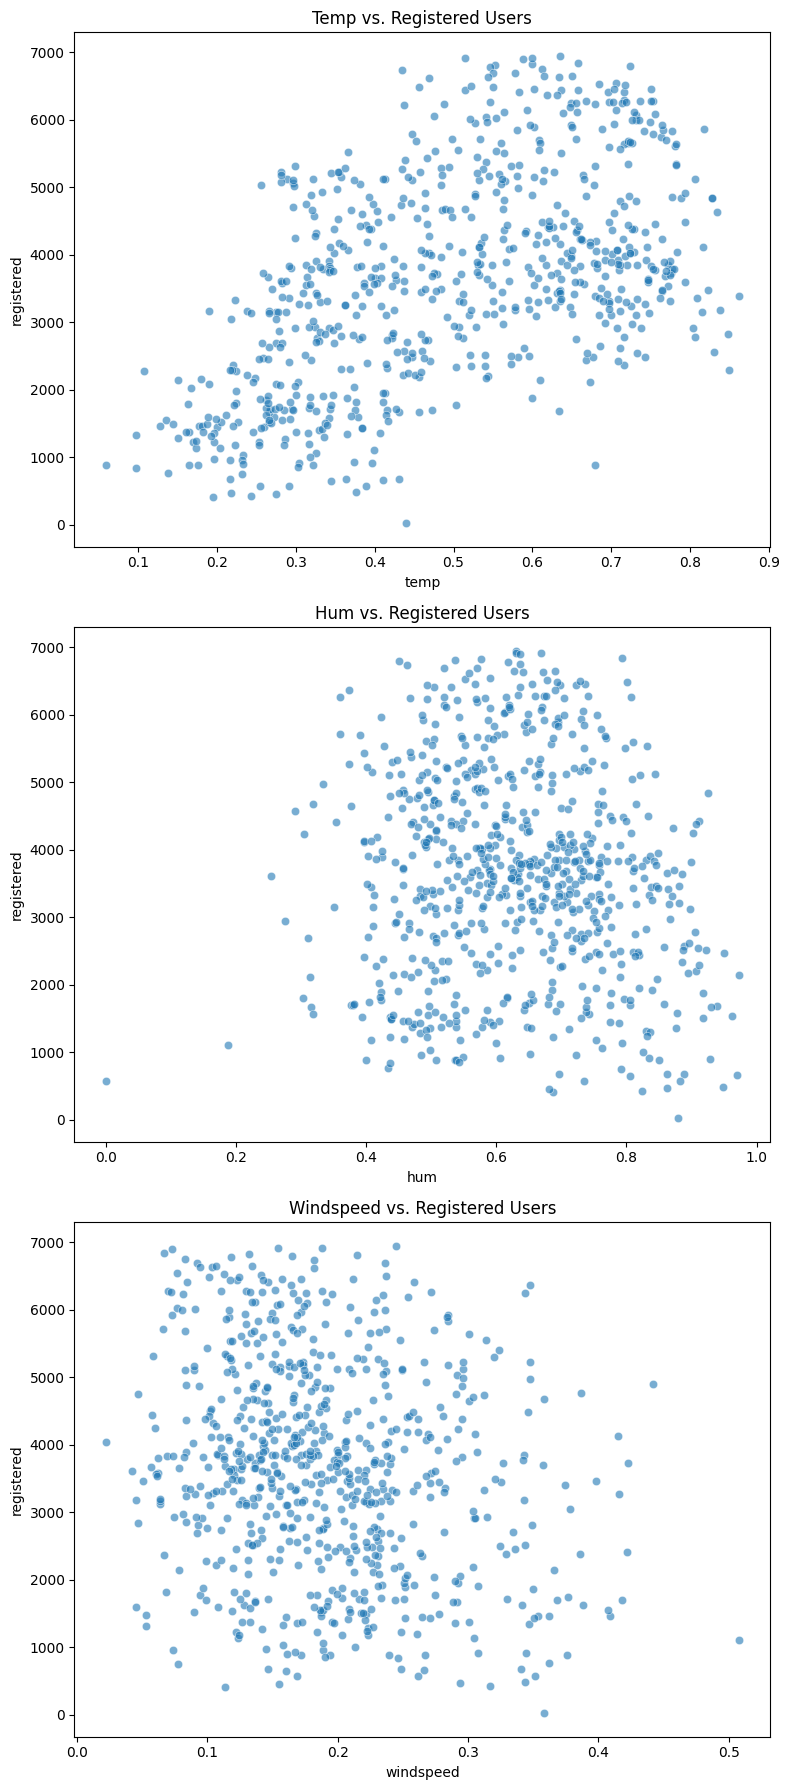

In [36]:
# Setting up the figure for registered users
fig, axs = plt.subplots(3, 1, figsize=(8, 18))
weather_conditions = ['temp', 'hum', 'windspeed']
title = 'Registered Users'

for i, condition in enumerate(weather_conditions):
    sns.scatterplot(data=days_df, x=condition, y='registered', ax=axs[i], alpha=0.6)
    axs[i].set_title(f'{condition.capitalize()} vs. {title}')

plt.tight_layout()
plt.show()

Analysis Based on Scatter Plots

Registered Users:
- Temperature vs. Registered Users: The plot shows an upward trend, which is consistent with the correlation matrix, signifying that higher temperatures positively affect bike rentals for registered users.

- Humidity vs. Registered Users: The distribution of data points is random, indicating that humidity does not have a strong impact on registered bike usage.

- Wind Speed vs. Registered Users: The scatter plot shows a broad distribution of rentals across wind speeds, confirming that wind speed has little to no significant effect on the bike usage of registered users.


## Conclusion

### Conclution question 1:

##### Conclusion:

Seasonal and weather conditions exhibit a substantial influence on bike-sharing usage. The peak usage occurs in summer and the least in winter, with transitional seasons displaying intermediate levels. Clear weather conditions significantly boost rentals, whereas adverse conditions, particularly heavy rain and snow, lead to a considerable decline in usage.

##### Business Insights:

- Demand Forecasting
 - Implement a dynamic inventory management system that aligns the availability of bikes and docking stations with weather forecasts and seasonal trends to ensure supply meets demand.

- Marketing Campaigns
 - Develop targeted marketing campaigns that encourage bike rentals during favorable conditions. Incentivize usage during less ideal weather with discounts or promotional offers.

- Service Adaptability
 - Introduce weather-protective gear for bikes and riders, such as waterproof bike covers and ponchos, which could be rented or sold to encourage usage during unexpected weather changes.

### Conclution question 2:
##### Conclusion:
The analysis reveals that bike sharing usage is slightly lower on weekends with a 3.54% decrease compared to weekdays. This suggests that the bike-sharing system is likely an essential part of the weekday routine for many users, possibly for commuting purposes.

##### Business Insights:

- Capitalize on the weekday demand by optimizing bike availability during peak commuting times and maintaining stations in strategic locations, such as near offices and transit centers.
  
- Implement targeted promotions to boost weekend rentals. This could include special weekend rates, family packages, or event-based offers.
  
- Investigate the reasons behind lower weekend usage through customer feedback and adapt services accordingly.
  

### Conclusion question 3:

#### Conclusion:
Temperature is a significant driver for bike rentals, with a positive correlation for both casual and registered users, though more pronounced for casual users. Humidity has a minor negative impact, and wind speed's effect is marginal. The different usage patterns between casual and registered users under various weather conditions provide actionable insights for tailoring bike-sharing services.

#### Business Insights:

- Implement a marketing strategy that promotes bike rentals during favorable weather conditions, especially targeting casual users who are more influenced by temperature.

- For registered users, offering weather protection accessories such as waterproof gear or windshields can encourage usage even when weather conditions are less ideal.

- Ensure reliable service availability during all weather conditions to support registered users, who may rely on bike-sharing for their daily commute.
